In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb 

from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve 

In [3]:
df = pd.read_csv('/content/gdrive/My Drive/IKST Data/Data_1.csv')


In [4]:
df.shape

(255818, 100)

In [5]:
df.isna().sum().sum()

0

In [6]:
df.nunique()

Unnamed: 0                 255818
State_Name                     28
District_Name                 474
Crop_Year                      18
Season                          6
                            ...  
District_Area                 491
Productivity               108751
GDP_per_capita_state          468
GDPagr_per_capita_state       468
State_pop_rural_percent        28
Length: 100, dtype: int64

In [7]:
df.groupby(['Crop']).mean()[['Production', 'Productivity', 'Area', 'Population']].reset_index().tail(20)

,Crop,Production,Productivity,Area,Population
53,Rice,105550.258022,1.859971,53391.036665,2.071657e+06
54,Safflower,3070.852149,0.505545,5853.576000,2.273821e+06
55,Samai,523.548387,0.494256,1237.161290,3.606280e+06
56,Sannhamp,92.228333,0.784935,126.999257,1.945524e+06
57,Sesamum,992.511667,0.408421,3050.325729,2.116075e+06
58,Small millets,1141.301706,0.624455,2890.007582,1.913557e+06
59,Soyabean,34907.295230,1.000859,33970.625366,1.811364e+06
60,Sugarcane,689271.609326,131.045462,9909.874652,2.060838e+06
61,Sunflower,4128.144454,0.845563,10225.831781,2.344649e+06
62,Sweet potato,1934.090929,9.151886,221.244942,2.043485e+06


In [8]:
df_corr = df.corr()

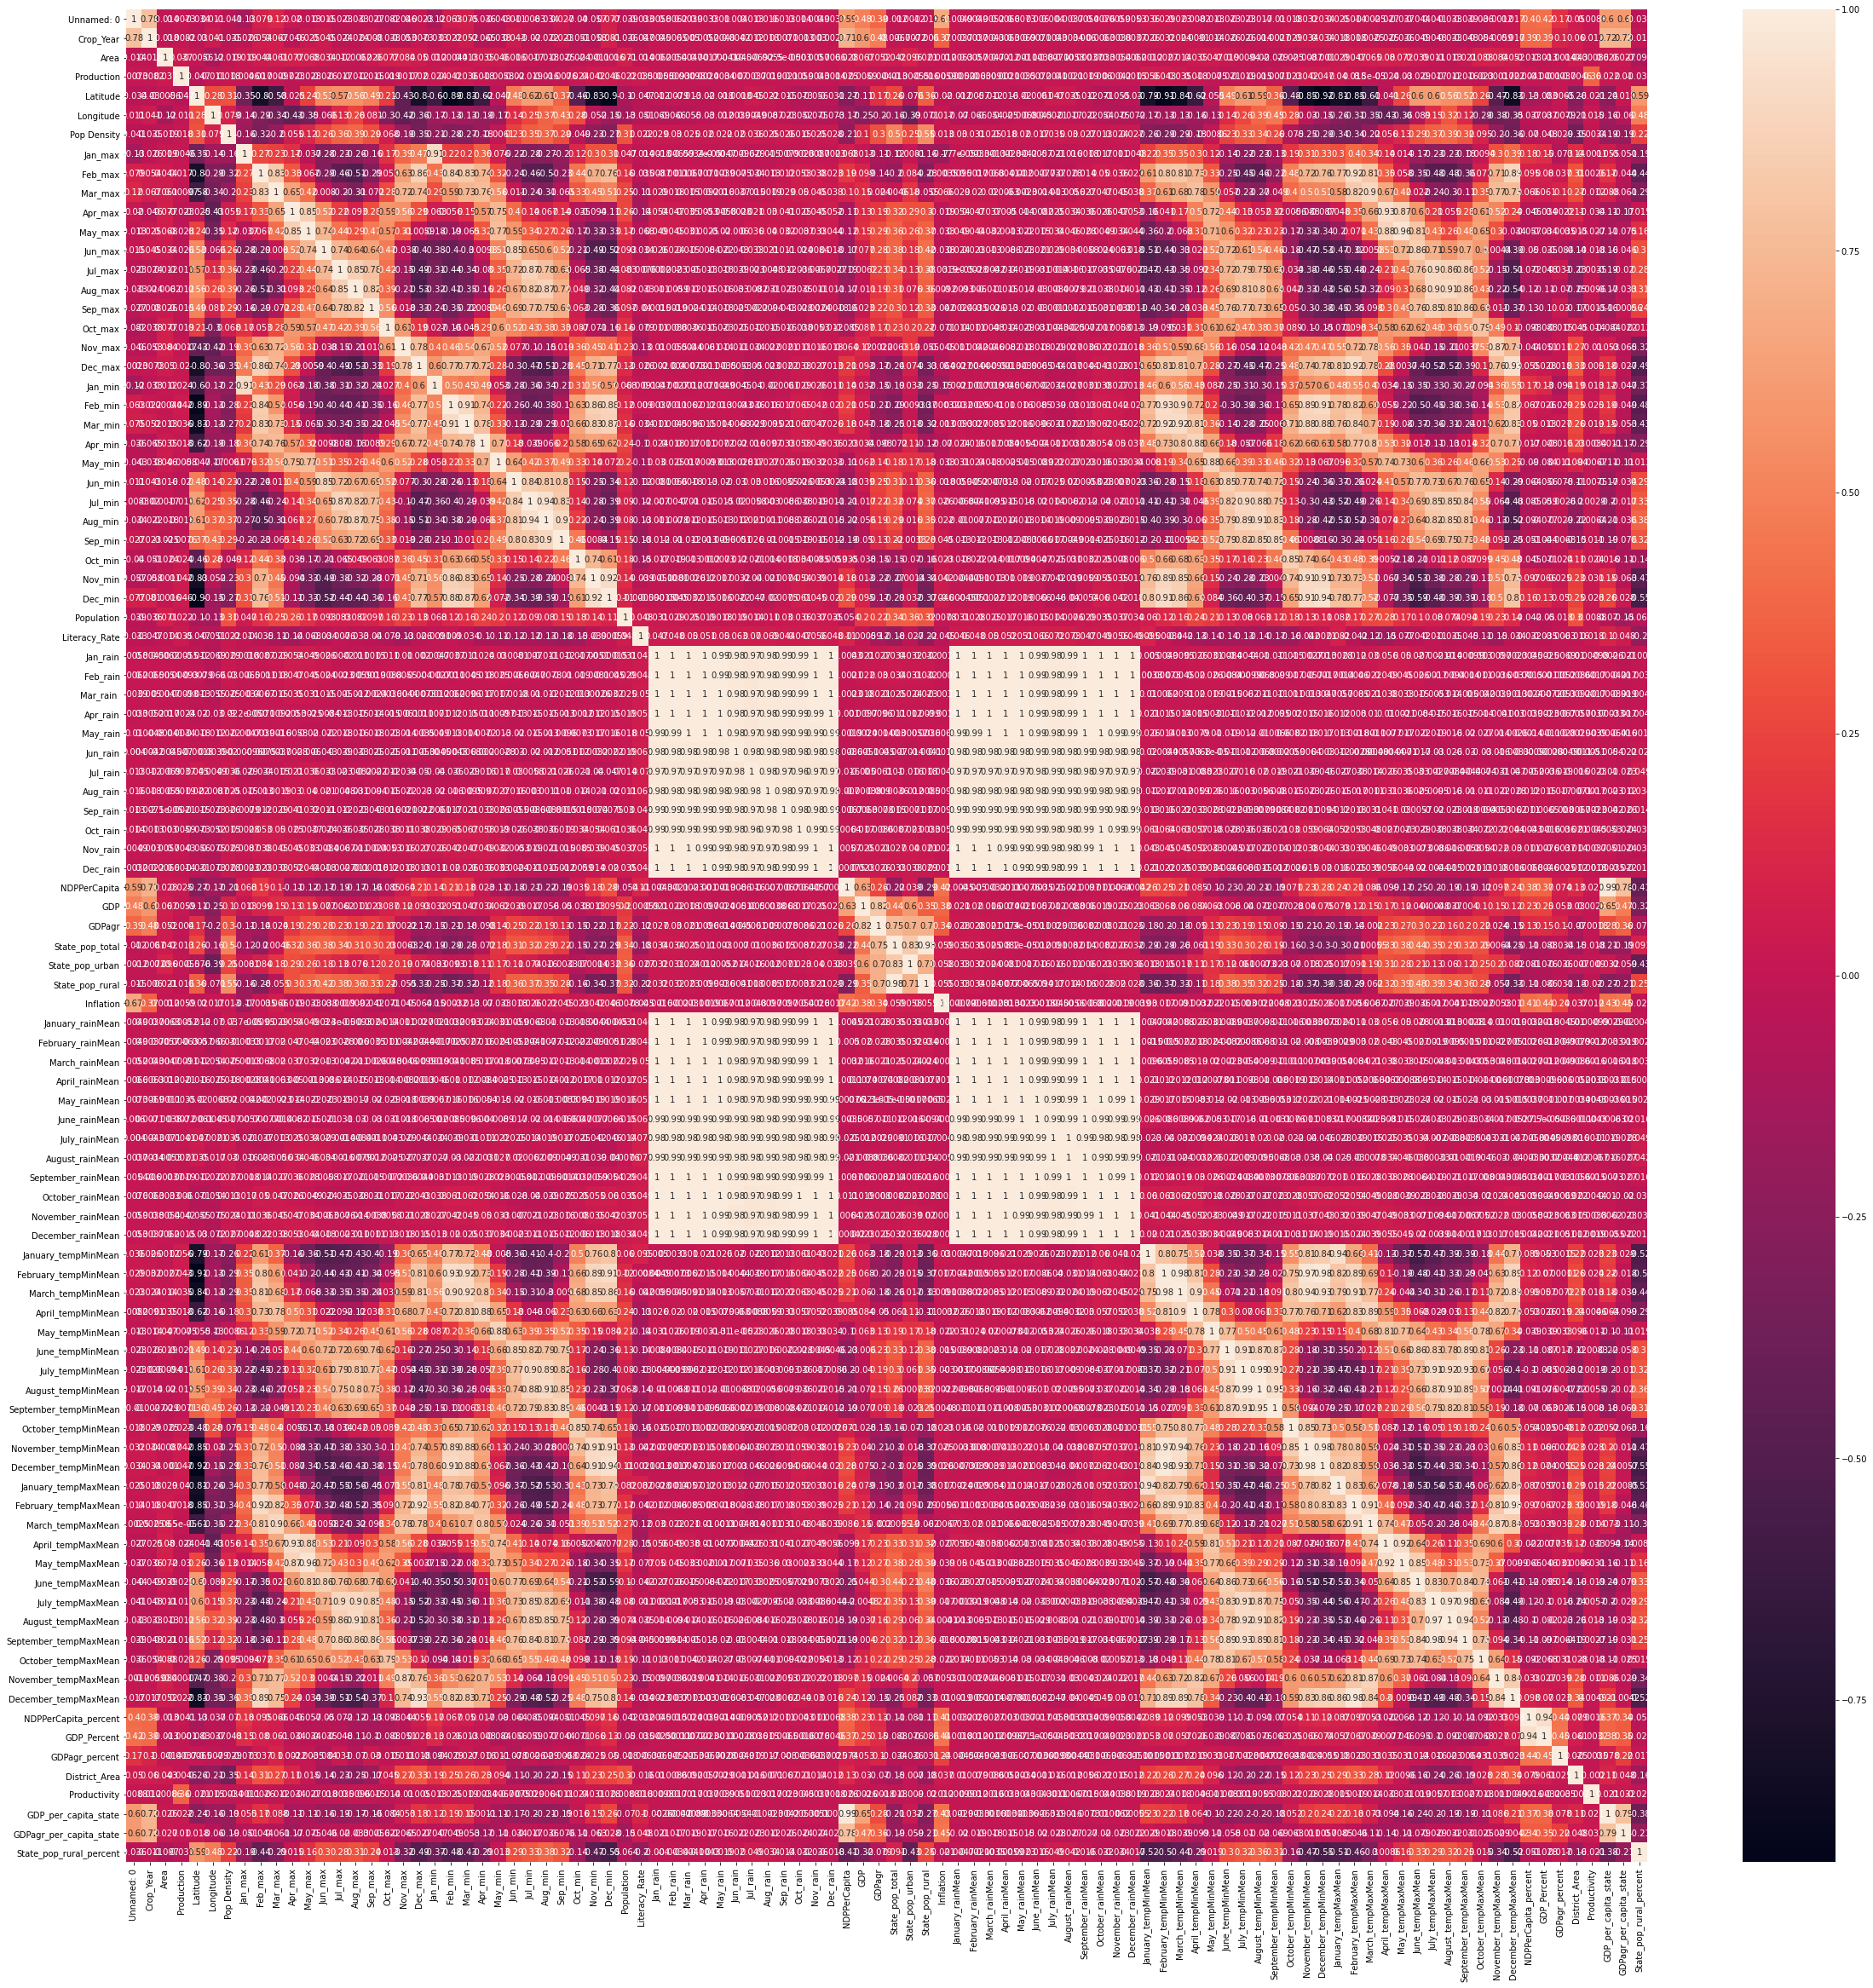

In [9]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_corr, annot=True)

In [10]:
d = dict(df["Season"].value_counts())
for w in sorted(d, key=d.get, reverse=True):
    print(w, d[w])
# sorted(dict(df["Crop"].value_counts()), key=dict(df["Crop"].value_counts()).get)

Kharif      105170
Rabi        73757
Whole Year  52594
Summer      15295
Winter      5014
Autumn      3988


In [11]:
(list(df.columns))

['Unnamed: 0',
 'State_Name',
 'District_Name',
 'Crop_Year',
 'Season',
 'Crop',
 'Area',
 'Production',
 'Latitude',
 'Longitude',
 'Pop Density',
 'Jan_max',
 'Feb_max',
 'Mar_max',
 'Apr_max',
 'May_max',
 'Jun_max',
 'Jul_max',
 'Aug_max',
 'Sep_max',
 'Oct_max',
 'Nov_max',
 'Dec_max',
 'Jan_min',
 'Feb_min',
 'Mar_min',
 'Apr_min',
 'May_min',
 'Jun_min',
 'Jul_min',
 'Aug_min',
 'Sep_min',
 'Oct_min',
 'Nov_min',
 'Dec_min',
 'Population',
 'Literacy_Rate',
 'Jan_rain',
 'Feb_rain',
 'Mar_rain ',
 'Apr_rain',
 'May_rain',
 'Jun_rain',
 'Jul_rain',
 'Aug_rain',
 'Sep_rain',
 'Oct_rain',
 'Nov_rain',
 'Dec_rain',
 'NDPPerCapita',
 'GDP',
 'GDPagr',
 'State_pop_total',
 'State_pop_urban',
 'State_pop_rural',
 'Inflation',
 'January_rainMean',
 'February_rainMean',
 'March_rainMean',
 'April_rainMean',
 'May_rainMean',
 'June_rainMean',
 'July_rainMean',
 'August_rainMean',
 'September_rainMean',
 'October_rainMean',
 'November_rainMean',
 'December_rainMean',
 'January_tempMinMean

In [12]:
df

,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Latitude,Longitude,Pop Density,Jan_max,Feb_max,Mar_max,Apr_max,May_max,Jun_max,Jul_max,Aug_max,Sep_max,Oct_max,Nov_max,Dec_max,Jan_min,Feb_min,Mar_min,Apr_min,May_min,Jun_min,Jul_min,Aug_min,Sep_min,Oct_min,Nov_min,Dec_min,Population,Literacy_Rate,Jan_rain,Feb_rain,Mar_rain,...,May_rainMean,June_rainMean,July_rainMean,August_rainMean,September_rainMean,October_rainMean,November_rainMean,December_rainMean,January_tempMinMean,February_tempMinMean,March_tempMinMean,April_tempMinMean,May_tempMinMean,June_tempMinMean,July_tempMinMean,August_tempMinMean,September_tempMinMean,October_tempMinMean,November_tempMinMean,December_tempMinMean,January_tempMaxMean,February_tempMaxMean,March_tempMaxMean,April_tempMaxMean,May_tempMaxMean,June_tempMaxMean,July_tempMaxMean,August_tempMaxMean,September_tempMaxMean,October_tempMaxMean,November_tempMaxMean,December_tempMaxMean,NDPPerCapita_percent,GDP_Percent,GDPagr_percent,District_Area,Productivity,GDP_per_capita_state,GDPagr_per_capita_state,State_pop_rural_percent
0,0,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0,14.6824,77.6017,213,28.728710,31.815359,34.620968,34.539333,34.84161,31.324333,28.520643,27.902905,29.906666,30.421616,28.831671,28.889673,14.431936,14.871429,18.869030,20.015333,21.217741,20.525331,20.313869,19.895487,19.731335,19.635485,19.557667,18.340324,4081148.0,63.57,0.194496,0.000000,0.749478,...,1.900539,1.809065,2.019378,2.807971,4.517269,3.566071,1.013084,0.153049,19.089252,16.764651,19.319015,21.546583,21.854763,21.095647,20.631549,20.380323,19.980646,19.559255,17.652553,15.450398,37.006250,32.420774,34.644351,35.593666,34.293685,30.005503,28.117549,27.957894,28.961734,29.513805,29.083219,28.924767,12.031203,12.890906,13.231510,19160.319249,0.121495,106.581183,31.523652,66.636715
1,1,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0,14.6824,77.6017,213,28.728710,31.815359,34.620968,34.539333,34.84161,31.324333,28.520643,27.902905,29.906666,30.421616,28.831671,28.889673,14.431936,14.871429,18.869030,20.015333,21.217741,20.525331,20.313869,19.895487,19.731335,19.635485,19.557667,18.340324,4081148.0,63.57,0.194496,0.000000,0.749478,...,1.900539,1.809065,2.019378,2.807971,4.517269,3.566071,1.013084,0.153049,19.089252,16.764651,19.319015,21.546583,21.854763,21.095647,20.631549,20.380323,19.980646,19.559255,17.652553,15.450398,37.006250,32.420774,34.644351,35.593666,34.293685,30.005503,28.117549,27.957894,28.961734,29.513805,29.083219,28.924767,12.031203,12.890906,13.231510,19160.319249,0.357143,106.581183,31.523652,66.636715
2,2,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0,14.6824,77.6017,213,28.728710,31.815359,34.620968,34.539333,34.84161,31.324333,28.520643,27.902905,29.906666,30.421616,28.831671,28.889673,14.431936,14.871429,18.869030,20.015333,21.217741,20.525331,20.313869,19.895487,19.731335,19.635485,19.557667,18.340324,4081148.0,63.57,0.194496,0.000000,0.749478,...,1.900539,1.809065,2.019378,2.807971,4.517269,3.566071,1.013084,0.153049,19.089252,16.764651,19.319015,21.546583,21.854763,21.095647,20.631549,20.380323,19.980646,19.559255,17.652553,15.450398,37.006250,32.420774,34.644351,35.593666,34.293685,30.005503,28.117549,27.957894,28.961734,29.513805,29.083219,28.924767,12.031203,12.890906,13.231510,19160.319249,0.100000,106.581183,31.523652,66.636715
3,3,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0,14.6824,77.6017,213,28.728710,31.815359,34.620968,34.539333,34.84161,31.324333,28.520643,27.902905,29.906666,30.421616,28.831671,28.889673,14.431936,14.871429,18.869030,20.015333,21.217741,20.525331,20.313869,19.895487,19.731335,19.635485,19.557667,18.340324,4081148.0,63.57,0.194496,0.000000,0.749478,...,1.900539,1.809065,2.019378,2.807971,4.517269,3.566071,1.013084,0.153049,19.089252,16.764651,19.319015,21.546583,21.854763,21.095647,20.631549,20.380323,19.980646,19.559255,17.652553,15.450398,37.006250,32.420774,34.644351,35.593666,34.293685,30

In [13]:
df_min_temp = df[[
                   'January_tempMinMean',
 'February_tempMinMean',
 'March_tempMinMean',
 'April_tempMinMean',
 'May_tempMinMean',
 'June_tempMinMean',
 'July_tempMinMean',
 'August_tempMinMean',
 'September_tempMinMean',
 'October_tempMinMean',
 'November_tempMinMean',
 'December_tempMinMean',
]]

In [14]:
df_min_temp_corr = df_min_temp.corr()

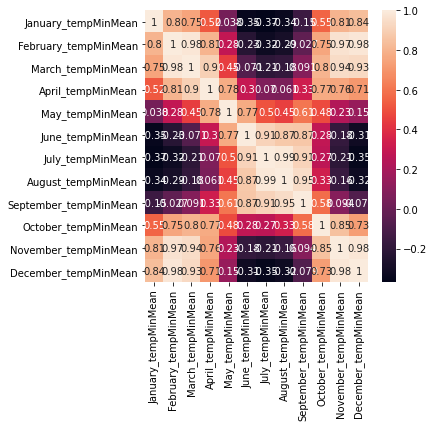

In [15]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_min_temp_corr, annot=True)

In [16]:
df_max_temp = df[[
                  'January_tempMaxMean',
 'February_tempMaxMean',
 'March_tempMaxMean',
 'April_tempMaxMean',
 'May_tempMaxMean',
 'June_tempMaxMean',
 'July_tempMaxMean',
 'August_tempMaxMean',
 'September_tempMaxMean',
 'October_tempMaxMean',
 'November_tempMaxMean',
 'December_tempMaxMean',
]]

In [17]:
df_max_temp_corr = df_max_temp.corr()

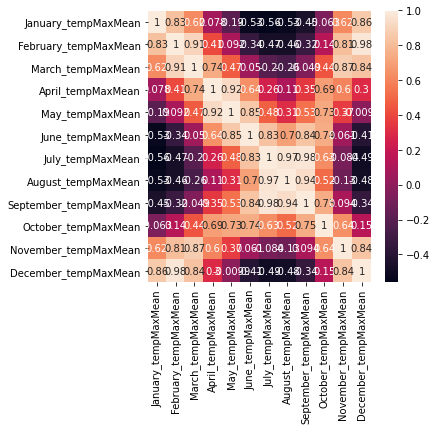

In [18]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_max_temp_corr, annot=True)

#### Groups to be formed in temperature
Jan-Mar (Gp 1)

Apr-May (Gp 2)

June-Sept (Gp 3)

Oct (Gp 4)

Nov-Dec (Gp 5)

In [19]:

# Min temp mean grouping

df['min_temp_mean_1'] = ( df['January_tempMinMean'] + df['February_tempMinMean'] + df['March_tempMinMean'] ) / 3
df['min_temp_mean_2'] = ( df['April_tempMinMean'] + df['May_tempMinMean'] ) / 2
df['min_temp_mean_3'] = ( df['June_tempMinMean'] + df['July_tempMinMean'] + df['August_tempMinMean'] + df['September_tempMinMean'] ) / 4
df['min_temp_mean_4'] = ( df['October_tempMinMean'] ) 
df['min_temp_mean_5'] = ( df['November_tempMinMean'] + df['December_tempMinMean'] ) / 2

# Max temp mean grouping

df['max_temp_mean_1'] = ( df['January_tempMaxMean'] + df['February_tempMaxMean'] + df['March_tempMaxMean'] ) / 3
df['max_temp_mean_2'] = ( df['April_tempMaxMean'] + df['May_tempMaxMean'] ) / 2
df['max_temp_mean_3'] = ( df['June_tempMaxMean'] + df['July_tempMaxMean'] + df['August_tempMaxMean'] + df['September_tempMaxMean'] ) / 4
df['max_temp_mean_4'] = ( df['October_tempMaxMean'] ) 
df['max_temp_mean_5'] = ( df['November_tempMaxMean'] + df['December_tempMaxMean'] ) / 2

In [20]:
df = df.drop(df.loc[:, 'Jan_max':'Dec_min'].columns, axis = 1)

In [21]:
df.shape

(255818, 86)

In [22]:
df = df.drop(df.loc[:, 'January_tempMinMean':'December_tempMaxMean'].columns, axis = 1)

In [23]:
df.shape

(255818, 62)

In [24]:
# Rainfall Mean grouping

df['rain_mean'] = (
    df['Jan_rain'] + 
    df['Feb_rain'] + 
    df['Mar_rain '] + 
    df['Apr_rain'] + 
    df['May_rain'] + 
    df['Jun_rain'] + 
    df['Jul_rain'] + 
    df['Aug_rain'] + 
    df['Sep_rain'] + 
    df['Oct_rain'] + 
    df['Nov_rain'] + 
    df['Dec_rain'] 
) / 12


In [25]:
df['rain_mean']

0         1.429547
1         1.429547
2         1.429547
3         1.429547
4         1.429547
            ...   
255813    3.380672
255814    3.380672
255815    3.380672
255816    3.380672
255817    3.380672
Name: rain_mean, Length: 255818, dtype: float64

In [26]:
df.shape

(255818, 63)

In [27]:
df = df.drop(df.loc[:, 'Jan_rain':'Dec_rain'].columns, axis = 1)
df = df.drop(df.loc[:, 'January_rainMean':'December_rainMean'].columns, axis = 1)

In [28]:
df.shape

(255818, 39)

In [29]:
df_target = df.copy()

In [30]:
df_target.shape

(255818, 39)

In [31]:
df_temp = df_target.groupby(['Crop']).sum()[['Production', 'Productivity', 'Area', 'Population']].reset_index()
crops = list(df_temp.sort_values(by=['Production'],  ascending=False).iloc[0:6,0])

In [32]:
top_dist_crop = dict()

df_temp1 = df_target.groupby(['Crop','District_Name']).sum()[['Production', 'Productivity', 'Area', 'Population']].reset_index()

for crop in crops:
    top_dist_crop[crop]=list(df_temp1.sort_values(by=['Production'],  ascending=False).groupby('Crop').get_group(crop)['District_Name'])

In [33]:
len(top_dist_crop['Coconut '][0:50])

# df_target.groupby(['Crop', 'District_Name']).get_group(('Coconut ', 'MALAPPURAM')).reset_index()

50

In [34]:
final_dfs = dict()

for crop in crops:
    dfs_crop = []

    for dist in top_dist_crop[crop]:
        dfs_crop.append(df_target.groupby(['Crop', 'District_Name']).get_group((crop, dist)).reset_index())
    
    final_dfs[crop] = pd.concat(dfs_crop, ignore_index=True)

In [35]:
final_dfs['Coconut '].head()

,index,Unnamed: 0,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Latitude,Longitude,Pop Density,Population,Literacy_Rate,NDPPerCapita,GDP,GDPagr,State_pop_total,State_pop_urban,State_pop_rural,Inflation,NDPPerCapita_percent,GDP_Percent,GDPagr_percent,District_Area,Productivity,GDP_per_capita_state,GDPagr_per_capita_state,State_pop_rural_percent,min_temp_mean_1,min_temp_mean_2,min_temp_mean_3,min_temp_mean_4,min_temp_mean_5,max_temp_mean_1,max_temp_mean_2,max_temp_mean_3,max_temp_mean_4,max_temp_mean_5,rain_mean
0,6077,6077,Kerala,MALAPPURAM,1997,Whole Year,Coconut,123798.0,683000.0,11.1112,76.1784,1058,4112920.0,93.57,13280,4445990.0,1105224,33406,15935,17471,8.98,14.226733,14.698759,11.640254,3887.448015,5.517052,133.089565,33.084596,52.298988,19.86511,21.160654,20.001314,19.731273,18.47803,32.101302,31.212814,27.687204,28.060952,27.630191,9.234123
1,16797,16993,Kerala,MALAPPURAM,1998,Whole Year,Coconut,99276.0,600000000.0,11.1112,76.1784,1058,4112920.0,93.57,14523,4948447.0,1111503,33406,15935,17471,7.25,9.359940,11.301352,0.568120,3887.448015,6043.756799,148.130486,33.272556,52.298988,19.86511,21.160654,20.001314,19.731273,18.47803,32.101302,31.212814,27.687204,28.060952,27.630191,7.718942
2,38915,39267,Kerala,MALAPPURAM,2000,Whole Year,Coconut,110378.0,626000000.0,11.1112,76.1784,1058,4112920.0,93.57,18117,6253380.0,1270793,33406,15935,17471,4.84,10.671961,11.262821,9.340640,3887.448015,5671.420029,187.193319,38.040861,52.298988,19.86511,21.160654,20.001314,19.731273,18.47803,32.101302,31.212814,27.687204,28.060952,27.630191,5.804300
3,38916,39268,Kerala,MALAPPURAM,2000,Whole Year,Coconut,110378.0,626000000.0,11.1112,76.1784,1058,4112920.0,93.57,19461,6916847.0,1278486,33406,15935,17471,4.84,7.418447,10.609734,0.605370,3887.448015,5671.420029,207.054032,38.271149,52.298988,19.86511,21.160654,20.001314,19.731273,18.47803,32.101302,31.212814,27.687204,28.060952,27.630191,5.804300
4,56861,57381,Kerala,MALAPPURAM,2001,Whole Year,Coconut,104171.0,599000000.0,11.1112,76.1784,1058,4112920.0,93.57,20094,7265883.0,1142449,33406,15935,17471,4.02,3.252659,5.046172,-10.640476,3887.448015,5750.160793,217.502335,34.198916,52.298988,19.86511,21.160654,20.001314,19.731273,18.47803,32.101302,31.212814,27.687204,28.060952,27.630191,7.415929


In [36]:
def corr_coeff_loss(y_true, y_pred):
    x = y_true
    y = y_pred
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xm = x - x_mean
    ym = y - y_mean
    r_num = np.sum(np.multiply(xm, ym))
    r_den = np.sqrt(np.multiply(np.sum(np.square(xm)), np.sum(np.square(ym))))
    r = r_num/r_den
    
    r = np.maximum(np.minimum(r, 1.0), -1.0)
    return np.square(r)

In [37]:
def df_prep_model(df_crop, drop_crop=True):

    if ('index' in df_crop.columns):
        df_crop = df_crop.drop(['index'], axis=1)
    if ('Unnamed: 0' in df_crop.columns):
        df_crop = df_crop.drop(['Unnamed: 0'], axis=1)
        
    df_crop_deduped = df_crop.drop_duplicates()
    if (drop_crop):
        df_crop_deduped_drop = df_crop_deduped.drop(columns=['Crop', 'State_Name'], axis=1)
    else:
        df_crop_deduped_drop = df_crop_deduped.drop(columns=['State_Name'], axis=1)
    df_crop_deduped_drop_ohe = pd.get_dummies(df_crop_deduped_drop)

    return df_crop_deduped_drop_ohe

In [38]:
def get_train_test_data(df_final, predict_production=True, std=True):
    
    X = df_final.drop(columns=["Productivity", "Production"], axis=1)
    if (predict_production):
        Y = df_final["Production"]
    else:
        Y = df_final["Productivity"]
    
    if (std):
        std_scaler = StandardScaler()
        # Y = std_scaler.fit_transform(Y)
        Y = StandardScaler().fit_transform(np.array(Y).reshape(-1, 1))

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=4123, test_size=0.3)

    return X_train, X_test, Y_train, Y_test

In [39]:
def get_results(model, X_train, X_test, Y_train, Y_test):

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    # Model Score
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)

    # Corr Coeff loss
    train_coeff_loss = corr_coeff_loss(Y_train, Y_pred_train)
    test_coeff_loss = corr_coeff_loss(Y_test, Y_pred_test)

    # MAPE Loss
    mape_train = mean_absolute_error(Y_train, Y_pred_train)
    mape_test = mean_absolute_error(Y_test, Y_pred_test)

    # MSE Loss
    mse_train = mean_squared_error(Y_train, Y_pred_train, squared=False)
    mse_test = mean_squared_error(Y_test, Y_pred_test, squared=False)

    # print(
    #     "MODEL SCORE \n" + 
    #     "Train: " + str(train_score) + "\n"
    #     "Test: " + str(test_score) + "\n"
    #     + "\n" +
    #     "CORRELATION COEFFICIENT LOSS \n" + 
    #     "Train: " + str(train_coeff_loss) + "\n"
    #     "Test: " + str(test_coeff_loss) + "\n"
    #     + "\n" +
    #     "MAPE LOSS \n" + 
    #     "Train: " + str(mape_train) + "\n"
    #     "Test: " + str(mape_test) + "\n"
    #     + "\n" +
    #     "MSE LOSS \n" + 
    #     "Train: " + str(mse_train) + "\n"
    #     "Test: " + str(mse_test) + "\n"
    # )

    results = (train_score, test_score, train_coeff_loss, test_coeff_loss, mape_train, mape_test, mse_train, mse_test)
    return results

In [40]:
model_name_map = {
        "lin_reg": "Linear Regression",
        "rfr" : "Randon Forest Regressor",
        "xgb" : "XGB Regressor",
        "svm" : "SVM Regressor with Gaussian Kernel",
        "mlp" : "MLP Regressor",
    }

In [41]:
def run_model(crop, model_name, drop_crop=True, predict_production=True, std=True):

    df_crop = final_dfs[crop].copy()
    df_crop_deduped_drop_ohe = df_prep_model(df_crop, drop_crop)
    X_train, X_test, Y_train, Y_test = get_train_test_data(df_crop_deduped_drop_ohe, predict_production, std)

    if (model_name=='lin_reg'):
        model = LinearRegression()
    elif (model_name=='rfr'):
        model = RandomForestRegressor()
    elif (model_name=='xgb'):
        model = xgb.XGBRegressor(verbosity=0)
    elif (model_name=='svm'):
        model = SVR()
    elif (model_name=='mlp'):
        model = MLPRegressor()
    else:
        print("No such model exists. Please type the correct model name and try again.")
        return 
    model.fit(X_train, Y_train)

    # print("Results after running the " + model_name_map[model_name] + " model on dataset for the crop " + crop + " are: ")
    # print()
    results = get_results(model, X_train, X_test, Y_train, Y_test)

    return results

In [42]:
# results = run_model(crops[0], 'lin_reg')

## Predicting productivity

In [43]:
df_results_productivity = pd.DataFrame({
    "Crop" : [],
    "Model": [],
    "Train Score": [],
    "Test Score": [],
    "Corr Coeff Loss Train": [],
    "Corr Coeff Loss Test": [],
    "MAPE Loss Train": [],
    "MAPE Loss Test": [],
    "MSE Loss Train": [],
    "MSE Loss Test": [],
})

In [44]:
for crop in crops:
    for model in model_name_map.keys():
        results = run_model(crop, model, predict_production=False, std=False, drop_crop=True)
        print()
        df_results_productivity = df_results_productivity.append(
            {
                "Crop" : crop,
                "Model": model_name_map[model],
                "Train Score": results[0],
                "Test Score": results[1],
                "Corr Coeff Loss Train": results[2],
                "Corr Coeff Loss Test": results[3],
                "MAPE Loss Train": results[4],
                "MAPE Loss Test": results[5],
                "MSE Loss Train": results[6],
                "MSE Loss Test": results[7],
            }, ignore_index=True
        )

In [45]:
df_results_productivity

,Crop,Model,Train Score,Test Score,Corr Coeff Loss Train,Corr Coeff Loss Test,MAPE Loss Train,MAPE Loss Test,MSE Loss Train,MSE Loss Test
0,Coconut,Linear Regression,6.806920e-01,4.828070e-01,0.680692,0.490643,1980.033922,2286.513837,2862.355466,3808.651904
1,Coconut,Randon Forest Regressor,9.788518e-01,8.136627e-01,0.980194,0.815713,342.959635,844.760841,736.640437,2286.098108
2,Coconut,XGB Regressor,9.012104e-01,7.455735e-01,0.910044,0.748350,974.114067,1254.737877,1592.114466,2671.321284
3,Coconut,SVM Regressor with Gaussian Kernel,-5.255468e-01,-4.003192e-01,0.033985,0.032166,3703.042981,3383.749995,6256.499785,6266.982514
4,Coconut,MLP Regressor,-2.347580e-01,-2.884648e-01,0.056008,0.034782,4515.983276,4753.815767,5628.719331,6011.477561
5,Sugarcane,Linear Regression,1.298251e-01,1.380182e-02,0.129825,0.031277,478.712347,498.598531,2548.558879,2831.612609
6,Sugarcane,Randon Forest Regressor,9.972115e-01,9.909125e-01,0.998459,0.991606,7.627463,20.596349,144.271089,271.814942
7,Sugarcane,XGB Regressor,9.999453e-01,9.868858e-01,0.999947,0.989484,11.145735,22.134765,20.198839,326.529941
8,Sugarcane,SVM Regressor with Gaussian Kernel,-1.273789e-03,-1.505624e-03,0.000407,0.000558,118.967375,132.438131,2733.806744,2853.503667
9,Sugarcane,MLP Regressor,-4.482954e-01,-3.780955e-01,0.004381,0.012783,1482.350812,1515.558273,3287.910264,3347.275059


In [46]:
# df_results_productivity.to_csv("Productivity_nonStd_Crop_only.csv")